In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Part1

In [2]:
data=pd.read_csv("ex2data1.txt",names=["Exam_1","Exam_2","Accepted"])
data.head()

,Exam_1,Exam_2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'Exam2')

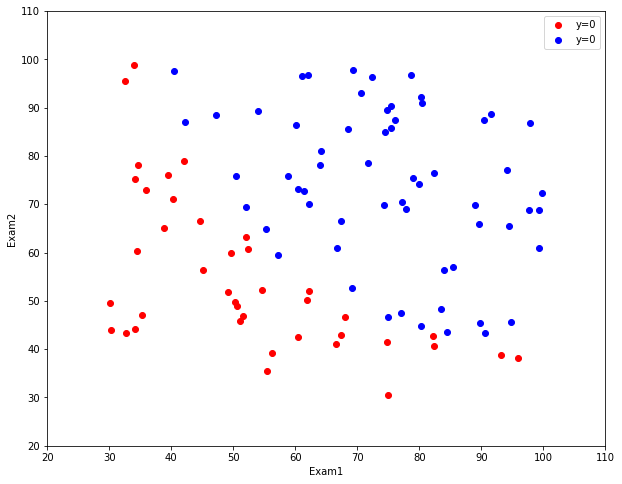

In [3]:
plt.figure(figsize=(10, 8))
plt.scatter(list((data[data['Accepted']==0]["Exam_1"]).values),list((data[data['Accepted']==0]["Exam_2"]).values),color='red',marker='o',label='y=0')
plt.scatter(list((data[data['Accepted']==1]["Exam_1"]).values),list((data[data['Accepted']==1]["Exam_2"]).values),color='blue',marker='o',label='y=0')
plt.xlim(20, 110)
plt.ylim(20, 110)
plt.legend(loc="upper right")
plt.xlabel("Exam1")
plt.ylabel("Exam2")

In [4]:
def Get(data):
    data.insert(0,'ones',1)
    X=(data.iloc[:,0:-1]).values
    Y=data.iloc[:,-1].values.reshape(len(data.iloc[:,-1]),-1)
    return X,Y
X,Y=Get(data)

$$sigmoid(z)=\frac{1}{1+e^{-z}}\$$

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

$$Loss = -(1/m)*\sum \limits _{i=1}^{m} Y*log({\hat{Y}})+(1-Y)*log(1-{\hat{Y}}) $$

In [6]:
def cost_function(X,Y,theta):
    Y_hat=sigmoid(X@theta)
    return -(np.sum(Y*np.log(Y_hat)+(1-Y)*np.log(1-Y_hat)))/len(X)

In [7]:
theta=np.zeros((3,1))
print(cost_function(X,Y,theta))

0.6931471805599453


$$ \Theta_{j}=\Theta_{j}-\alpha*((1/m)*\sum \limits _{i=1}^{m}({\hat{Y}}-Y))$$

In [8]:
def GD(X,Y,theta,alpha,iters):
    costs=[]
    for i in range(iters):
        Y_hat=sigmoid(X@theta)
        theta=theta-(alpha/len(X))*((X.T)@(Y_hat-Y))
        cost=cost_function(X,Y,theta)
        costs.append(cost)
    return theta

In [9]:
alpha=0.005
iters=200000
theta_final=GD(X,Y,theta,alpha,iters)
theta_final

array([[-29.86963587],
       [  0.23309024],
       [  0.2264124 ]])

In [10]:
intercept= -theta_final[0,0]/theta_final[2,0]
slope= -theta_final[1,0]/theta_final[2,0]
print(intercept,slope)

131.92579478744906 -1.0294941359159562


Text(0, 0.5, 'Exam2')

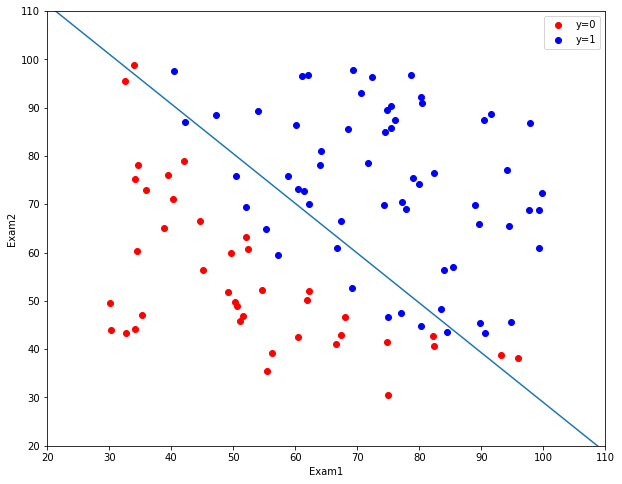

In [11]:
x=np.linspace(20,110,100)
y=intercept+slope*x
plt.figure(figsize=(10, 8))
plt.plot(x,y)
plt.scatter(list((data[data['Accepted']==0]["Exam_1"]).values),list((data[data['Accepted']==0]["Exam_2"]).values),color='red',marker='o',label='y=0')
plt.scatter(list((data[data['Accepted']==1]["Exam_1"]).values),list((data[data['Accepted']==1]["Exam_2"]).values),color='blue',marker='o',label='y=1')
plt.xlim(20, 110)
plt.ylim(20, 110)
plt.legend(loc="upper right")
plt.xlabel("Exam1")
plt.ylabel("Exam2")

# Part2

In [18]:
data2=pd.read_csv("ex2data2.txt",names=["Test_1","Test_2","Accepted"])
data2

,Test_1,Test_2,Accepted
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


Text(0, 0.5, 'Test2')

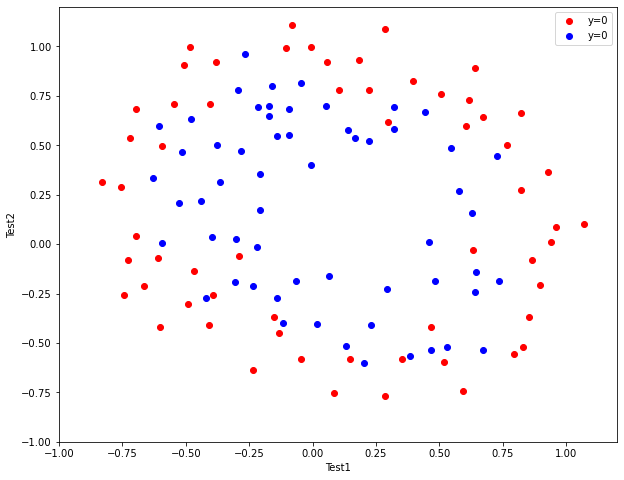

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(list((data2[data2['Accepted']==0]["Test_1"]).values),list((data2[data2['Accepted']==0]["Test_2"]).values),color='red',marker='o',label='y=0')
plt.scatter(list((data2[data2['Accepted']==1]["Test_1"]).values),list((data2[data2['Accepted']==1]["Test_2"]).values),color='blue',marker='o',label='y=0')
plt.legend(loc="upper right")
plt.xlim(-1, 1.2)
plt.ylim(-1, 1.2)
plt.xlabel("Test1")
plt.ylabel("Test2")

In [20]:
def mapFeature(x1,x2,power):
    data={}
    for i in np.arange(power+1):
        for j in np.arange(i+1):
            data['F{}{}'.format(i-j,j)]=np.power(x1,i-j)*np.power(x2,j)
    return pd.DataFrame(data)
    

In [21]:
x1=data2['Test_1']
x2=data2["Test_2"]
data3=mapFeature(x1,x2,6)
X2=data3.values
Y2=data2.iloc[:,-1].values
Y2=Y2.reshape(len(Y2),1)

In [22]:
def cost_function2(X,Y,theta,lamda):
    Y_hat=sigmoid(X@theta)
    reg=np.sum(np.power(theta[1:],2))*(lamda/(2*len(X)))
    return -(np.sum(Y*np.log(Y_hat)+(1-Y)*np.log(1-Y_hat)))/len(X)+reg

In [23]:
theta=np.zeros((28,1))
lamda=1
print(cost_function2(X2,Y2,theta,lamda))

0.6931471805599454


In [24]:
def GD2(X,Y,theta,alpha,iters,lamda):
    costs=[]
    for i in range(iters):
        reg=theta[1:]*(lamda/len(X))
        reg=np.insert(reg,0,values=0,axis=0)
        Y_hat=sigmoid(X@theta)
        theta=theta-(alpha/len(X))*((X.T)@(Y_hat-Y))-reg
        cost=cost_function2(X,Y,theta,lamda)
        costs.append(cost)
    return theta,costs

In [25]:
alpha=0.001
iters=200000
lamda=0.001
theta_final,costs=GD2(X2,Y2,theta,alpha,iters,lamda)

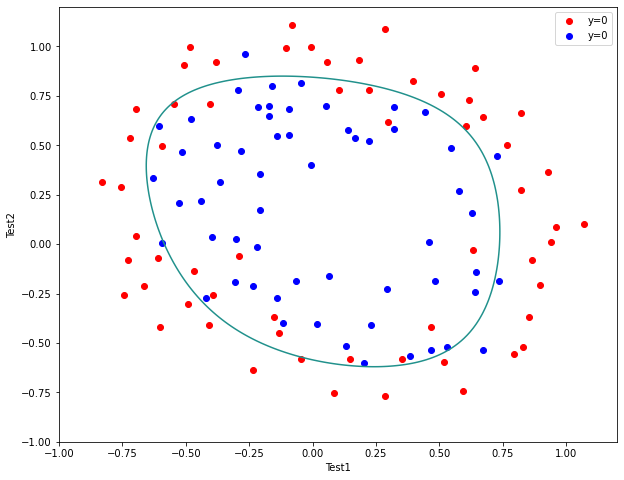

In [26]:
x=np.linspace(-1.2,1.2,200)
xx,yy=np.meshgrid(x,x)
z=mapFeature(xx.ravel(),yy.ravel(),6).values
zz=(z@theta_final).reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.scatter(list((data2[data2['Accepted']==0]["Test_1"]).values),list((data2[data2['Accepted']==0]["Test_2"]).values),color='red',marker='o',label='y=0')
plt.scatter(list((data2[data2['Accepted']==1]["Test_1"]).values),list((data2[data2['Accepted']==1]["Test_2"]).values),color='blue',marker='o',label='y=0')
plt.legend(loc="upper right")
plt.xlim(-1, 1.2)
plt.ylim(-1, 1.2)
plt.xlabel("Test1")
plt.ylabel("Test2")
plt.contour(xx,yy,zz,0)